In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset
dataset_path = r"C:\Users\alexs\Documents\Python Scripts\Trees in Satellite Imagery\Trees in Satellite Imagery"

train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels="inferred",
    label_mode="int",
    image_size=(128, 128),
    batch_size=32,
    shuffle=True
)

# Split into training and validation datasets
val_size = int(0.2 * len(train_dataset))
val_dataset = train_dataset.take(val_size)
train_dataset = train_dataset.skip(val_size)

# Normalize the pixel values
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

# Apply augmentation to training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))


Found 10400 files belonging to 2 classes.


In [2]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add Dropout layer to prevent overfitting
    layers.Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])


C:\Users\alexs\Documents\Python Scripts\Trees in Satellite Imagery\tensorflow_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)


Epoch 1/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 36s 135ms/step - accuracy: 0.7800 - loss: 0.4678 - val_accuracy: 0.8447 - val_loss: 0.3808
Epoch 2/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 35s 134ms/step - accuracy: 0.8774 - loss: 0.3452 - val_accuracy: 0.8938 - val_loss: 0.3143
Epoch 3/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 36s 135ms/step - accuracy: 0.8846 - loss: 0.3258 - val_accuracy: 0.9106 - val_loss: 0.2431
Epoch 4/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 36s 136ms/step - accuracy: 0.8834 - loss: 0.3051 - val_accuracy: 0.9038 - val_loss: 0.2352
Epoch 5/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 36s 135ms/step - accuracy: 0.8908 - loss: 0.2929 - val_accuracy: 0.9159 - val_loss: 0.2122
Epoch 6/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 36s 136ms/step - accuracy: 0.8990 - loss: 0.2539 - val_accuracy: 0.9226 - val_loss: 0.2196
Epoch 7/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 36s 136ms/step - accuracy: 0.9001 - loss: 0.2380 - val_accuracy: 0.9236 - val_loss: 0.2077
Epoch 8/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 36s 136ms/step - accuracy: 0.9118 - loss: 0

65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9437 - loss: 0.1613
Validation Accuracy: 0.9418269395828247


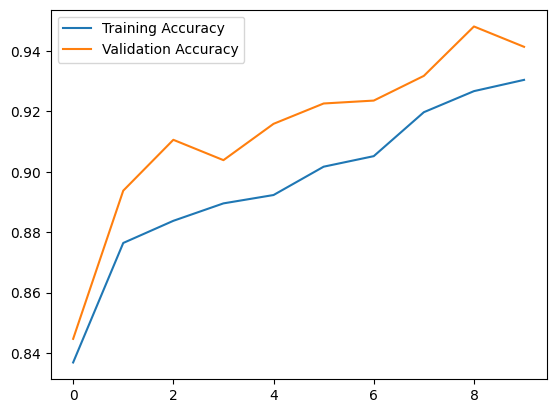

In [4]:
# Evaluate model
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f"Validation Accuracy: {val_accuracy}")

# Visualize training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


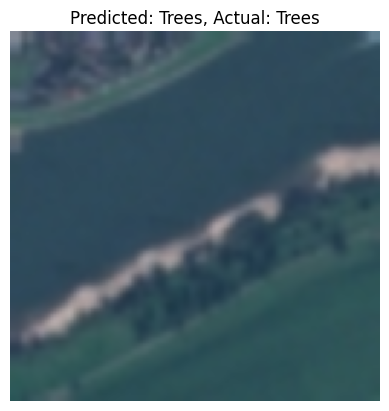

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Get one batch of images and labels
for images, labels in val_dataset.take(1):
    sample_images = images.numpy()
    sample_labels = labels.numpy()

# Select a single image
image_index = 7  # Change this index to view other images in the batch
sample_image = sample_images[image_index]
sample_label = sample_labels[image_index]

# Predict the classification
prediction = model.predict(tf.expand_dims(sample_image, axis=0))
predicted_class = "Trees" if prediction[0] > 0.5 else "No Trees"

# Plot the image and prediction
plt.imshow(sample_image)
plt.title(f"Predicted: {predicted_class}, Actual: {'Trees' if sample_label == 1 else 'No Trees'}")
plt.axis("off")
plt.show()
